In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

DataSet I

In [4]:
#import dataset
df = pd.read_csv('data/data_set_A.csv')

#vew dataset
df.head()

,0,1
0,-1.534076,5.169982
1,1.452231,2.699340
2,0.861024,2.281911
3,1.546562,1.711730
4,3.088828,0.481944


In [5]:
#convert them to numpy arrays
x = df.values

#viiew the shape of the dataset
x.shape

(250, 2)

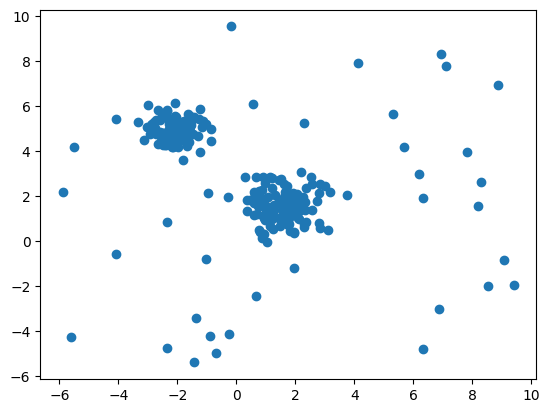

In [6]:
#plot the dataset
plt.scatter(x[:,0], x[:,1])

In [7]:
#trim using isolation forest
clf = IsolationForest(contamination = 0.1)

#fit the model
clf.fit(x)

#predict the outliers
predictions = clf.predict(x)

In [8]:
#get percentage of prediction that are outliers
outlier_percentage = list(predictions).count(-1)/predictions.shape[0]
print('Outlier percentage:', outlier_percentage)

Outlier percentage: 0.1


In [11]:
#assign the predictions to a new variable
outliers = x[predictions == -1]

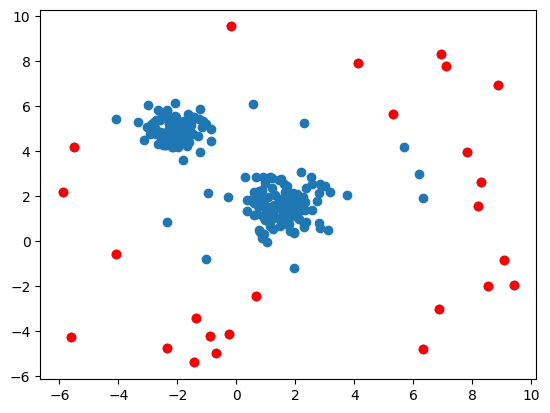

In [12]:
#plot the outliers as red
plt.scatter(x[:,0], x[:,1])
plt.scatter(outliers[:,0], outliers[:,1], color = 'red')

Dataset II - Time Series

In [14]:
#read the dataset
df = pd.read_csv('data/sensors.csv', index_col = 'time')

#view the dataset
df.head()

,sensor1,sensor2,sensor3
time,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405
2020-04-01 00:01:00,2.258430,1.054156,11.453157
2020-04-01 00:02:00,4.834818,0.284641,10.082687
2020-04-01 00:03:00,5.058023,0.845871,9.870637
2020-04-01 00:04:00,6.888020,-2.019289,9.265985


In [15]:
#check the index type
type(df.index)

pandas.core.indexes.base.Index

In [16]:
#convert the index to datetime
df.index = pd.to_datetime(df.index)

#confirm the index type
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
#conver the dataframe to numpy array
x = df.values

In [18]:
#initialize isolation forest
clf = IsolationForest(contamination = 0.1)

#fit the model
clf.fit(x)

#predict the outliers
predictions = clf.predict(x)

#view the decision function
clf.decision_function(x)

array([-0.09094427,  0.07189618,  0.15307852, ...,  0.04267012,
       -0.04716906,  0.07343174])

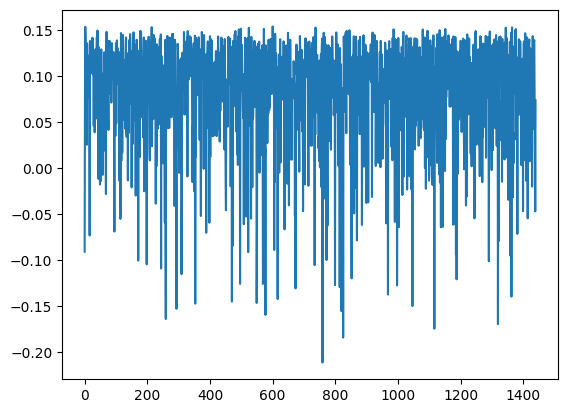

In [19]:
#visualize the decision function
plt.plot(clf.decision_function(x))

In [20]:
#add the dedcision function to the dataframe as health
df['health'] = clf.decision_function(x)

#view the dataframe
df.head()

,sensor1,sensor2,sensor3,health
time,,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405,-0.090944
2020-04-01 00:01:00,2.258430,1.054156,11.453157,0.071896
2020-04-01 00:02:00,4.834818,0.284641,10.082687,0.153079
2020-04-01 00:03:00,5.058023,0.845871,9.870637,0.139653
2020-04-01 00:04:00,6.888020,-2.019289,9.265985,0.102652


<AxesSubplot: xlabel='time'>

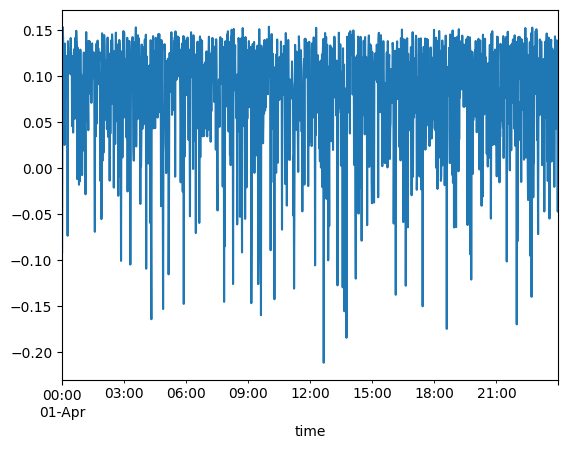

In [21]:
#plot the health
df['health'].plot()

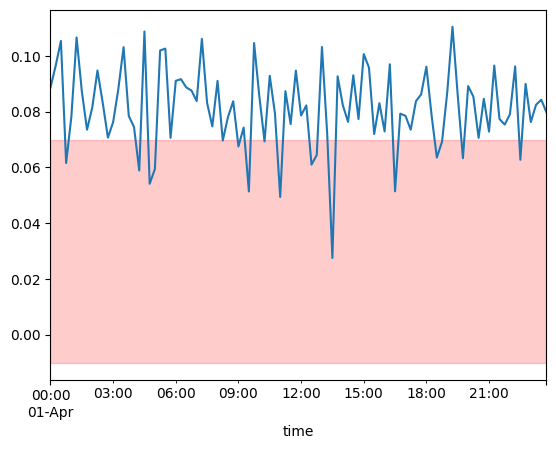

In [31]:
#plot a resampled version at 15 minutes
df['health'].resample('15min').mean().plot()

#indicate threshold for anomaly
plt.axhspan(-0.01, 0.07, color = 'red', alpha = 0.2)